In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
datapath1 = "../Data/COVID Impact Survey/cis_week1.csv"
datapath2 = "../Data/COVID Impact Survey/cis_week2.csv"
datapath3 = "../Data/COVID Impact Survey/cis_week3.csv"
week1 = pd.read_csv(datapath1)
week2 = pd.read_csv(datapath2)
week3 = pd.read_csv(datapath3)


week1_chi = week1[week1['P_GEO'] == '(14) Chicago-Naperville-Elgin, Illinois-Indiana-Wisconsin']

week2_chi = week2[week2['P_GEO'] == '(14) Chicago-Naperville-Elgin, Illinois-Indiana-Wisconsin']

week3_chi = week3[week3['P_GEO'] == '(14) Chicago-Naperville-Elgin, Illinois-Indiana-Wisconsin']


C:\Anaconda3\envs\datascience_env\lib\site-packages\IPython\core\interactiveshell.py:3062: DtypeWarning: Columns (97,157,158,159,171,173) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Anaconda3\envs\datascience_env\lib\site-packages\IPython\core\interactiveshell.py:3062: DtypeWarning: Columns (157,158,159,171,173) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Anaconda3\envs\datascience_env\lib\site-packages\IPython\core\interactiveshell.py:3062: DtypeWarning: Columns (157,158,159,173) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
selected_vars = [
    'SU_ID','ECON5A_A',
    'ECON5A_B',
    'SOC1','SOC2A','SOC3A','SOC4A', 
    'PHYS8', 
    'ECON1','ECON2', 'ECON3','ECON4A','ECON4B',
    'ECON6A','ECON6B','ECON6C','ECON6D','ECON6E','ECON6F','ECON6G','ECON6H','ECON6I','ECON6J','ECON6K','ECON6L',
    'PHYS9A','PHYS9B','PHYS9C','PHYS9D','PHYS9E','PHYS9F','PHYS9G','PHYS9H','PHYS5','PHYS6',
    'AGE7',
    'GENDER',
    'RACETH',
    'HHINCOME',
    'EDUCATION',
    'HHSIZE1','HH01S','HH25S','HH612S','HH1317S','HH18OVS',
    'P_DENSE']

NONRESPONSES = [
    "(998) SKIPPED ON WEB",
    "(777) DON'T KNOW",
    "(98) SKIPPED ON WEB",
    "(77) DON'T KNOW"
]

HHINC_NONRESP = [
    "REFUSED",
    "SKIPPED ON WEB",
    "DON'T KNOW"
]

In [4]:
week1_chi = week1_chi[selected_vars]
week1_chi.shape

(431, 47)

In [5]:
#nonresponse replacement for entire dataframe
week1_chi.replace(to_replace = NONRESPONSES, value = np.nan, inplace = True)
week1_chi.head()

SU_ID            ECON5A_A            ECON5A_B      SOC1  \
7   20009247      (3) Never true      (3) Never true  (3) Some   
22  20041071  (2) Sometimes true  (2) Sometimes true  (2) Most   
34  20055590      (3) Never true      (3) Never true  (4) None   
73  20110053      (3) Never true      (3) Never true  (3) Some   
77  20112885      (3) Never true      (3) Never true  (2) Most   

                      SOC2A                    SOC3A    SOC4A          PHYS8  \
7   (3) A few times a month  (1) Basically every day   (2) No       (3) Good   
22  (3) A few times a month  (1) Basically every day   (2) No       (3) Good   
34   (2) A few times a week  (1) Basically every day   (2) No       (3) Good   
73         (4) Once a month   (2) A few times a week   (2) No  (2) Very good   
77         (4) Once a month  (1) Basically every day  (1) Yes  (1) Excellent   

                                                ECON1 ECON2  ...  \
7   (1) Yes, I worked for someone else for wages, ...    40  ...   
22  (1) Yes, I worked for someone else for wages, ...    45  ...   
34          (3) No, I did not work for pay last week.   NaN  ...   
73  (2) Yes, I worked as self-employed in my own b...   NaN  ...   
77          (3) No, I did not work for pay last week.   NaN  ...   

                     RACETH                    HHINCOME  \
7   (1) White, non-Hispanic            $150,000 or more   
22  (2) Black, non-Hispanic   $75,000 to under $100,000   
34  (1) White, non-Hispanic  $100,000 to under $150,000   
73  (1) White, non-Hispanic  $100,000 to under $150,000   
77  (1) White, non-Hispanic    $50,000 to under $75,000   

                      EDUCATION            HHSIZE1 HH01S HH25S HH612S HH1317S  \
7          (5) Bachelors degree    (2) Two persons     0     0      0       0   
22  (3) Some college, no degree  (3) Three persons     0     0      0       1   
34  (3) Some college, no degree   (5) Five persons     0     0      0       1   
73         (5) Bachelors degree    (2) Two persons     0     0      0       0   
77           (6) Masters degree  (3) Three persons     1     0      0       0   

   HH18OVS    P_DENSE  
7        2  (3) Urban  
22       2  (3) Urban  
34       4  (3) Urban  
73       2  (3) Urban  
77       2  (3) Urban  

[5 rows x 47 columns]

In [6]:
#nonresponse replacement for HHINCOME
week1_chi['HHINCOME'].replace(to_replace=HHINC_NONRESP, value = np.nan, inplace = True)
week1_chi['HHINCOME'].tail()

6564    $100,000 to under $150,000
6568                           NaN
6581     $75,000 to under $100,000
6583      $50,000 to under $75,000
6596      $50,000 to under $75,000
Name: HHINCOME, dtype: object

In [7]:
#type conversions
#first we deal with hhsize
hhsize_repl_dict = {
    "(1) One person, I live by myself": 1,
    "(2) Two persons": 2,
    "(3) Three persons": 3,
    "(4) Four persons": 4,
    "(5) Five persons": 5,
    "(6) Six or more persons" : 6
}
week1_chi['HHSIZE1'].replace(to_replace=hhsize_repl_dict, inplace = True)
week1_chi['HHSIZE1'].unique()

array([2, 3, 5, 1, 6, 4], dtype=int64)

In [8]:
#null value analysis
#almost every variable has null values
print("NULL VALUE REPORT")
print(week1_chi.isna().sum())

NULL VALUE REPORT
SU_ID          0
ECON5A_A       3
ECON5A_B       3
SOC1           3
SOC2A          0
SOC3A          3
SOC4A          0
PHYS8          1
ECON1          6
ECON2        257
ECON3         20
ECON4A        10
ECON4B        12
ECON6A         6
ECON6B         7
ECON6C        11
ECON6D         8
ECON6E         6
ECON6F         8
ECON6G         6
ECON6H         7
ECON6I         7
ECON6J         6
ECON6K         7
ECON6L         8
PHYS9A         9
PHYS9B        29
PHYS9C        39
PHYS9D        28
PHYS9E         7
PHYS9F        18
PHYS9G        21
PHYS9H         9
PHYS5          5
PHYS6          3
AGE7           0
GENDER         0
RACETH         0
HHINCOME      21
EDUCATION      0
HHSIZE1        0
HH01S          0
HH25S          0
HH612S         0
HH1317S        0
HH18OVS        0
P_DENSE        0
dtype: int64


In [9]:
#if we remove all the records with nulls in them we'd be left with 144 rows only
week1_chi.dropna().shape

(144, 47)

In [10]:
#this leads to 66% of records being dropped
1 - week1_chi.dropna().shape[0]/week1_chi.shape[0]

0.665893271461717

In [11]:
#econ2 has 257 values missing; that's 60% of the data. 
#it doesn't make sense to impute a value into 60% of the data using only 40%
week1_chi.drop(['ECON2'], axis = 1, inplace = True)

In [12]:
#now we only drop only 26% of records
1 - week1_chi.dropna().shape[0]/431

0.2621809744779582

In [13]:
missing_vars = [
    'ECON5A_A', 'ECON5A_B',
    'SOC1', 'SOC3A',
    'PHYS8',
    'ECON1', 'ECON3',
    'ECON4A', 'ECON4B',
    'ECON6A', 'ECON6B', 'ECON6C', 'ECON6D', 'ECON6E', 'ECON6F', 'ECON6G', 'ECON6H', 'ECON6I', 'ECON6J', 'ECON6K', 'ECON6L',
    'PHYS9A', 'PHYS9B', 'PHYS9C', 'PHYS9D', 'PHYS9E', 'PHYS9F', 'PHYS9G', 'PHYS9H', 'PHYS5', 'PHYS6',
    'AGE7', 'HHINCOME']
    
#we need to impute missing values for 33 variables
len(missing_vars)

33

In [14]:
#KS - use more advanced forms of imputation (cluster based imputation)


def impute_val(df, col_names, imp_type = 'median'):
    df_copy = df.copy(deep = True)
    for col_name in col_names:
        if type(df.iloc[0][col_name]) == str:
            mode = df[col_name].mode().values[0]
            df_copy[col_name].replace(np.nan, mode, inplace = True)
        if type(df.iloc[0][col_name]) == float or type(df.iloc[0][col_name]) == int:
            if imp_type == 'median':
                imp_val = df[col_name].median()
            elif imp_type == 'mean':
                imp_val = df[col_name].mean()
            df_copy[col_name].replace(np.nan, imp_val, inplace = True)
    return df_copy
            
        
week1_chi = impute_val(week1_chi, missing_vars, 'median')#.isna().sum()
week1_chi.isna().sum()

SU_ID        0
ECON5A_A     0
ECON5A_B     0
SOC1         0
SOC2A        0
SOC3A        0
SOC4A        0
PHYS8        0
ECON1        0
ECON3        0
ECON4A       0
ECON4B       0
ECON6A       0
ECON6B       0
ECON6C       0
ECON6D       0
ECON6E       0
ECON6F       0
ECON6G       0
ECON6H       0
ECON6I       0
ECON6J       0
ECON6K       0
ECON6L       0
PHYS9A       0
PHYS9B       0
PHYS9C       0
PHYS9D       0
PHYS9E       0
PHYS9F       0
PHYS9G       0
PHYS9H       0
PHYS5        0
PHYS6        0
AGE7         0
GENDER       0
RACETH       0
HHINCOME     0
EDUCATION    0
HHSIZE1      0
HH01S        0
HH25S        0
HH612S       0
HH1317S      0
HH18OVS      0
P_DENSE      0
dtype: int64

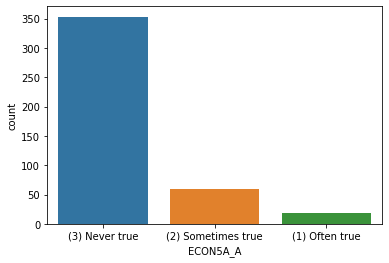

In [15]:
#we now have a modelling ready dataset ready; let's look at the food insecurity question A response dist one last time
#responses are imbalanced
sns.countplot(week1_chi['ECON5A_A'])

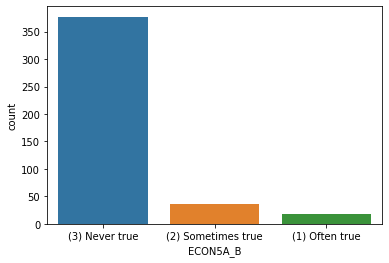

In [16]:
#let's look at the food insecurity question B response dist; responses are imbalanced
sns.countplot(week1_chi['ECON5A_B'])

In [17]:
#we need to form a final dependent variable detecting food insecurity
food_insec = []
for (respA, respB) in zip(week1_chi['ECON5A_A'].values, week1_chi['ECON5A_B'].values):
    measA = False
    measB = False
    if respA == "(2) Sometimes true" or respA =="(1) Often true":
        measA = True
    if respB == "(2) Sometimes true" or respB == "(1) Often true":
        measB = True
    food_insec.append(measA or measB)
week1_chi['food_insec'] = food_insec
week1_chi

SU_ID            ECON5A_A            ECON5A_B      SOC1  \
7     20009247      (3) Never true      (3) Never true  (3) Some   
22    20041071  (2) Sometimes true  (2) Sometimes true  (2) Most   
34    20055590      (3) Never true      (3) Never true  (4) None   
73    20110053      (3) Never true      (3) Never true  (3) Some   
77    20112885      (3) Never true      (3) Never true  (2) Most   
...        ...                 ...                 ...       ...   
6564  29951872      (3) Never true      (3) Never true  (3) Some   
6568  29956649      (3) Never true      (3) Never true  (3) Some   
6581  29972480      (3) Never true      (3) Never true  (3) Some   
6583  29975637      (3) Never true      (3) Never true  (2) Most   
6596  29997329      (3) Never true      (3) Never true  (2) Most   

                        SOC2A                    SOC3A    SOC4A  \
7     (3) A few times a month  (1) Basically every day   (2) No   
22    (3) A few times a month  (1) Basically every day   (2) No   
34     (2) A few times a week  (1) Basically every day   (2) No   
73           (4) Once a month   (2) A few times a week   (2) No   
77           (4) Once a month  (1) Basically every day  (1) Yes   
...                       ...                      ...      ...   
6564         (4) Once a month  (1) Basically every day  (1) Yes   
6568         (4) Once a month   (2) A few times a week   (2) No   
6581   (2) A few times a week  (3) A few times a month   (2) No   
6583           (5) Not at all   (2) A few times a week   (2) No   
6596   (2) A few times a week  (1) Basically every day  (1) Yes   

              PHYS8                                              ECON1 ECON3  \
7          (3) Good  (1) Yes, I worked for someone else for wages, ...    40   
22         (3) Good  (1) Yes, I worked for someone else for wages, ...    45   
34         (3) Good          (3) No, I did not work for pay last week.    23   
73    (2) Very good  (2) Yes, I worked as self-employed in my own b...    40   
77    (1) Excellent          (3) No, I did not work for pay last week.    80   
...             ...                                                ...   ...   
6564  (2) Very good  (1) Yes, I worked for someone else for wages, ...    30   
6568  (1) Excellent          (3) No, I did not work for pay last week.     0   
6581       (3) Good  (1) Yes, I worked for someone else for wages, ...    40   
6583       (3) Good          (3) No, I did not work for pay last week.     0   
6596  (2) Very good          (3) No, I did not work for pay last week.     0   

      ...                    HHINCOME  \
7     ...            $150,000 or more   
22    ...   $75,000 to under $100,000   
34    ...  $100,000 to under $150,000   
73    ...  $100,000 to under $150,000   
77    ...    $50,000 to under $75,000   
...   ...                         ...   
6564  ...  $100,000 to under $150,000   
6568  ...    $50,000 to under $75,000   
6581  ...   $75,000 to under $100,000   
6583  ...    $50,000 to under $75,000   
6596  ...    $50,000 to under $75,000   

                                              EDUCATION HHSIZE1 HH01S HH25S  \
7                                  (5) Bachelors degree       2     0     0   
22                          (3) Some college, no degree       3     0     0   
34                          (3) Some college, no degree       5     0     0   
73                                 (5) Bachelors degree       2     0     0   
77                                   (6) Masters degree       3     1     0   
...                                                 ...     ...   ...   ...   
6564                        (3) Some college, no degree       3     0     0   
6568                               (4) Associate degree       1     0     0   
6581                        (3) Some college, no degree       2     0     0   
6583  (2) HIGH SCHOOL GRADUATE - high school DIPLOMA...       2     0     0   
6596  (2) HIGH SCHOOL GRADUATE - high school DIPLOMA...       1 

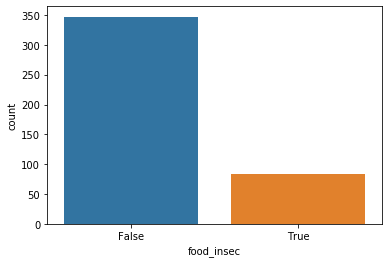

In [18]:
#let's look at the dist of the food insec dependent var; it's still imbalanced; but better off than before
sns.countplot(week1_chi['food_insec'])

In [19]:
#the balance is 80-20; it's doesn't require rebalancing
week1_chi['food_insec'].value_counts(normalize = True)

False    0.805104
True     0.194896
Name: food_insec, dtype: float64

In [26]:
week1_chi['SOC1'].unique()

array(['(3) Some', '(2) Most', '(4) None', '(1) All'], dtype=object)

In [20]:
#persist the data
week1_chi.to_csv('../Data/COVID Impact Survey/cis_proc_data/cis_week1_proc.csv')